In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Importing the dataset
data = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# these are the columns that we are going to use
data.loc[:,['MSSubClass', 'Neighborhood', 'OverallQual', 'TotalBsmtSF', '1stFlrSF',
            '2ndFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice']]

,MSSubClass,Neighborhood,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageCars,GarageArea,MoSold,YrSold,SalePrice
0,60,CollgCr,7,856,856,854,1710,2,548,2,2008,208500
1,20,Veenker,6,1262,1262,0,1262,2,460,5,2007,181500
2,60,CollgCr,7,920,920,866,1786,2,608,9,2008,223500
3,70,Crawfor,7,756,961,756,1717,3,642,2,2006,140000
4,60,NoRidge,8,1145,1145,1053,2198,3,836,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,Gilbert,6,953,953,694,1647,2,460,8,2007,175000
1456,20,NWAmes,6,1542,2073,0,2073,2,500,2,2010,210000
1457,70,Crawfor,7,1152,1188,1152,2340,1,252,5,2010,266500
1458,20,NAmes,5,1078,1078,0,1078,1,240,4,2010,142125


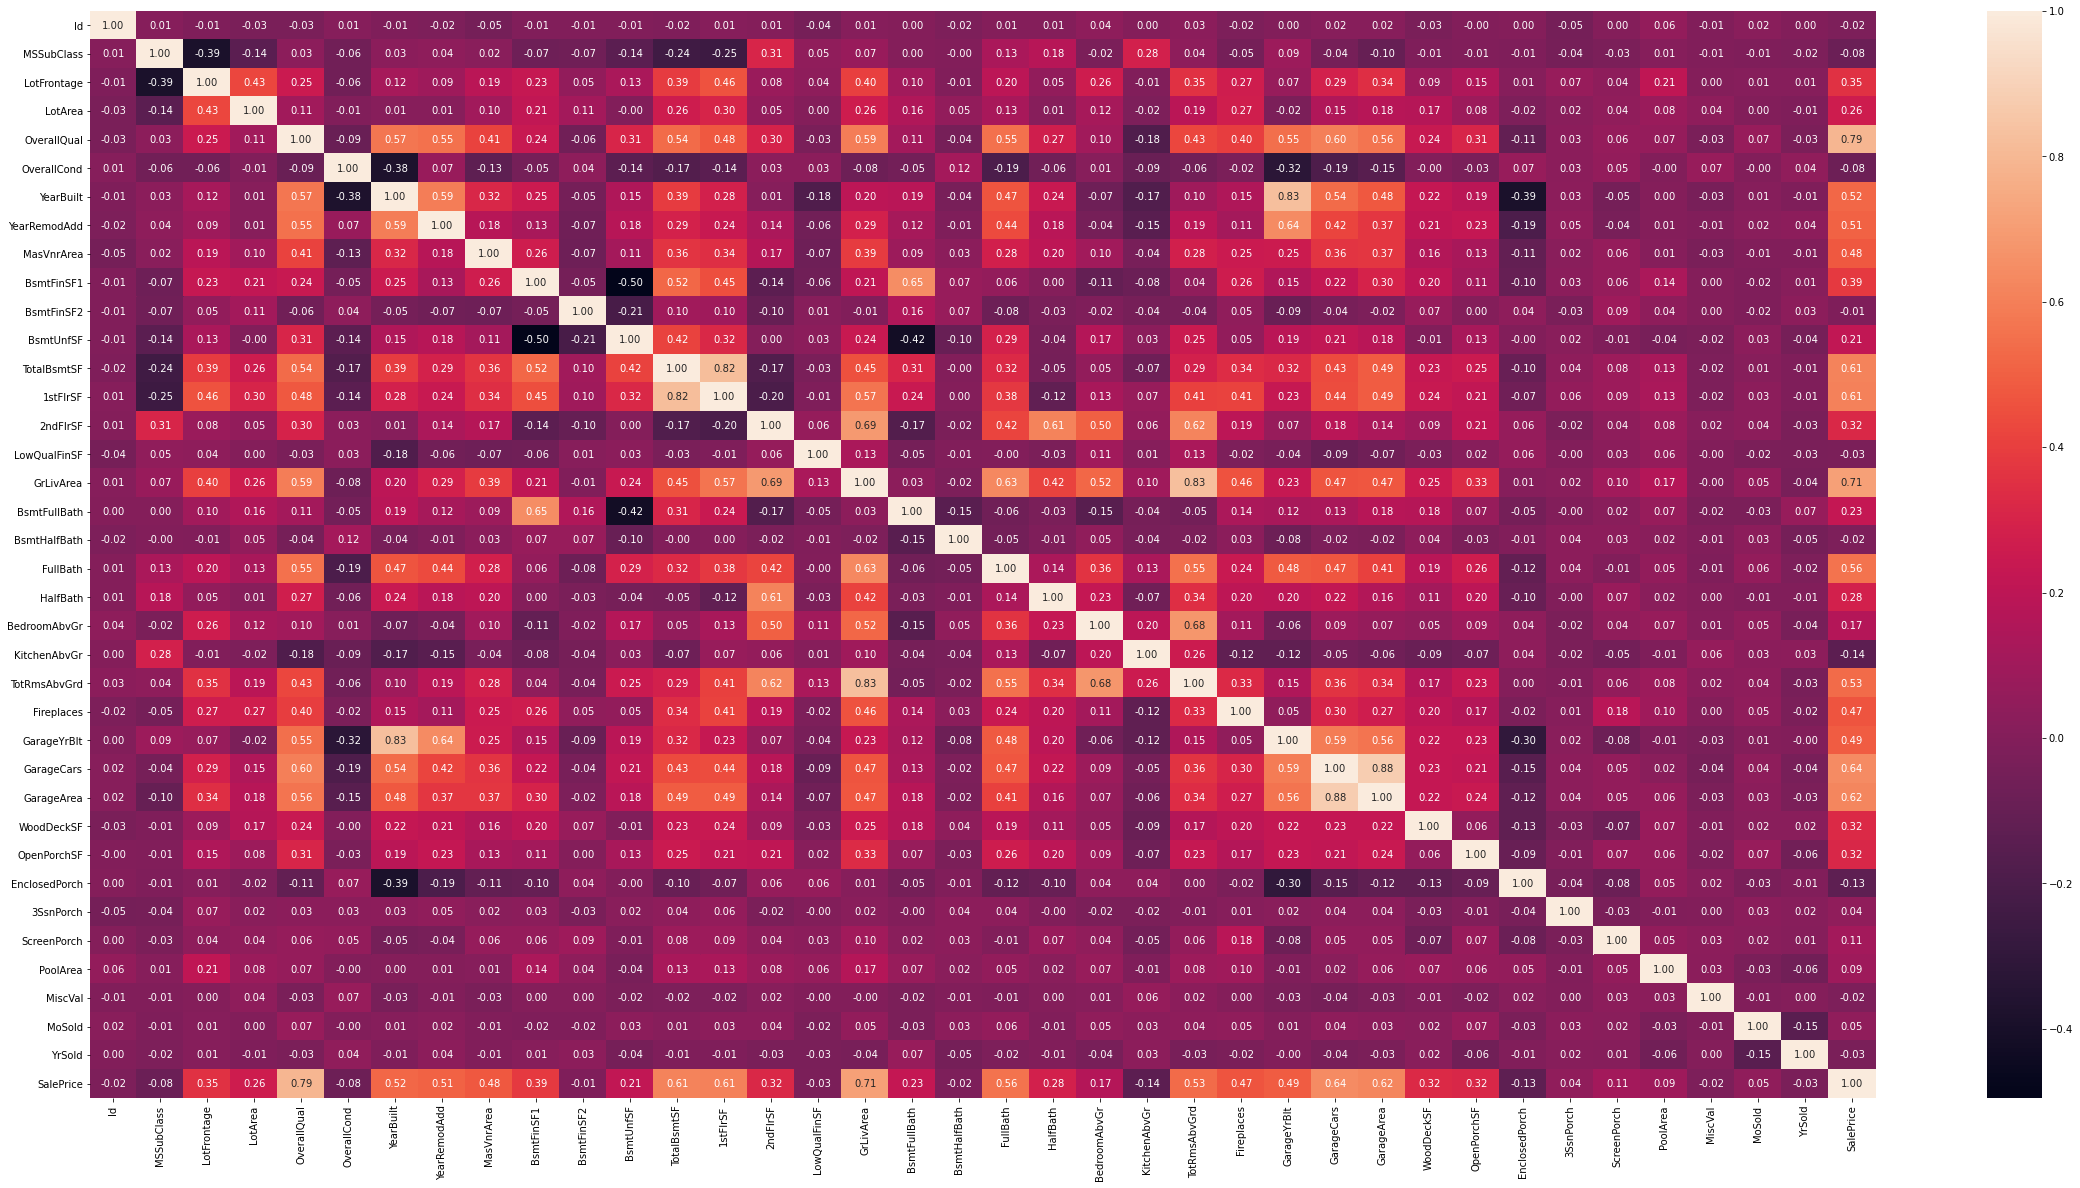

In [4]:
# getting the corr we are taking the strongly correlated ones with the correlation more than .6
plt.figure(figsize=(40,20))
corr_df = data.corr()
sb.heatmap(corr_df, annot=True, fmt="0.2f");

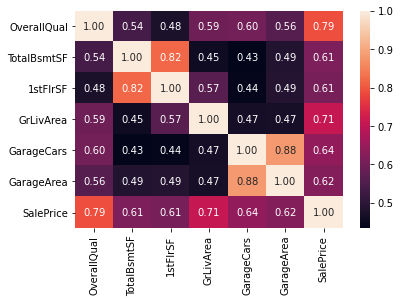

In [5]:
# we see that we can combine the duplicates that are strongly correlated GarageArea and GarageCars so we only need GarageArea
corr_cols = data[corr_df[corr_df['SalePrice']>.6].index]
sb.heatmap(corr_cols.corr(), annot=True, fmt="0.2f");

In [6]:
# we see that 1stFlrSF is included in GrLivArea so we only need GrLivArea
data.loc[:,'1stFlrSF'] + data.loc[:,'2ndFlrSF'] - data.loc[:,'GrLivArea']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Length: 1460, dtype: int64

In [7]:
# we see that sometimes the TotalBsmtSF is the same big as the 1stFlrSF but sometimes smaller that shows that it's not the same thing
data.loc[:,'1stFlrSF'] - data.loc[:,'TotalBsmtSF']

0         0
1         0
2         0
3       205
4         0
       ... 
1455      0
1456    531
1457     36
1458      0
1459      0
Length: 1460, dtype: int64

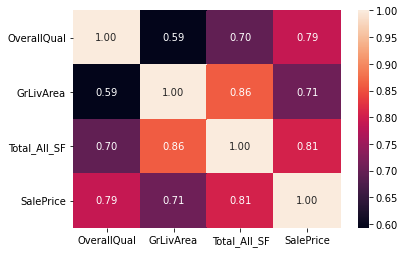

In [8]:
# so we can make one big column of GrLivArea + TotalBsmtSF + GarageArea
data['Total_All_SF'] =  data.GrLivArea + data.TotalBsmtSF + data.GarageArea

# we make SalePrice the last column
data = data[list(data.columns[:-2]) + ['Total_All_SF', 'SalePrice']]

# we see Total_All_SF is much better than GrLivArea so we are going to use OverallQual and Total_All_SF
sb.heatmap(data.loc[:,['OverallQual', 'GrLivArea', 'Total_All_SF', 'SalePrice']].corr(), annot=True, fmt="0.2f");

the slope is -1694 per year


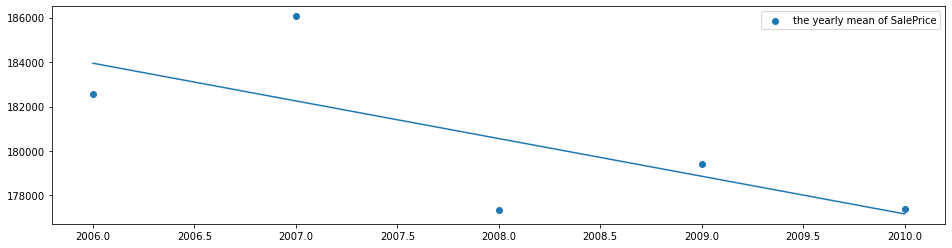

In [9]:
# we see here that the price didn't go up in the five years
mean_of_year = data.SalePrice.groupby(data.YrSold).mean()
X = mean_of_year.index.values.reshape(-1, 1)
y = mean_of_year.values

reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

plt.figure(figsize=(16,4))
plt.scatter(X, y, label='the yearly mean of SalePrice')
plt.plot(X, y_pred)
plt.legend();

print(f'the slope is {reg.coef_[0]:.0f} per year')

the Total_All_SF mean is 3046


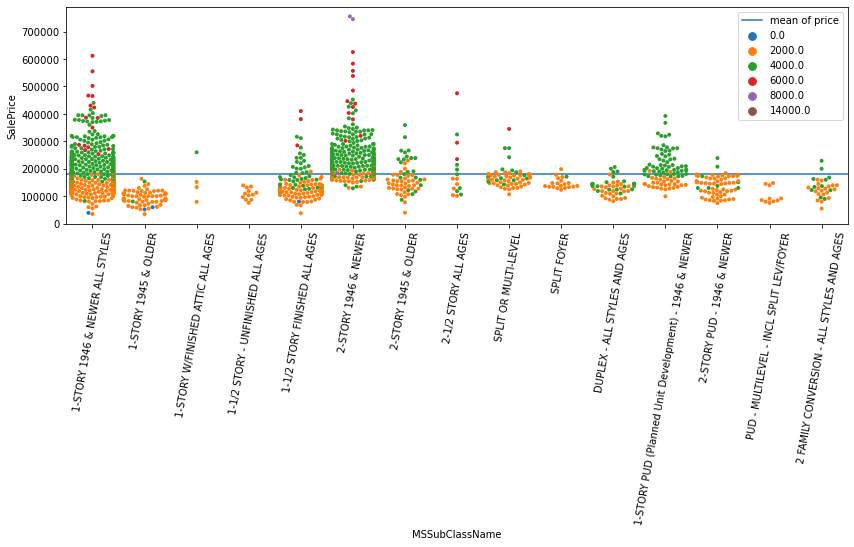

In [10]:
# we see here that the type doesn't matter all the 3046 Total_All_SF's are around the mean
# and wee see by the first two columns that the age doesn't matter
# the thing that matters is the Total_All_SF

# here is the meaning of the numbers
lst = [['1-STORY 1946 & NEWER ALL STYLES', 20],
       ['1-STORY 1945 & OLDER', 30],
       ['1-STORY W/FINISHED ATTIC ALL AGES', 40],
       ['1-1/2 STORY - UNFINISHED ALL AGES', 45],
       ['1-1/2 STORY FINISHED ALL AGES', 50],
       ['2-STORY 1946 & NEWER', 60],
       ['2-STORY 1945 & OLDER', 70],
       ['2-1/2 STORY ALL AGES', 75],
       ['SPLIT OR MULTI-LEVEL', 80],
       ['SPLIT FOYER', 85],
       ['DUPLEX - ALL STYLES AND AGES', 90],
       ['1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 120],
       ['2-STORY PUD - 1946 & NEWER', 160],
       ['PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 180],
       ['2 FAMILY CONVERSION - ALL STYLES AND AGES', 190]]

# we are making a new column MSSubClassName
data['MSSubClassName'] = data.loc[:,['MSSubClass']].replace([lst[i][1] for i in range(len(lst))],
                                                              [lst[i][0] for i in range(len(lst))])
plt.figure(figsize=(14, 4))
data.sort_values("MSSubClass", inplace = True, ignore_index=True) 
sb.swarmplot(data.MSSubClassName, data.SalePrice, size=4, hue=((data.Total_All_SF/2000).round()) * 2000)
plt.axhline(data.SalePrice.mean(), label='mean of price')
plt.xticks(rotation=80)
plt.legend();

print(f'the Total_All_SF mean is {data.Total_All_SF.mean():.0f}')

del data['MSSubClassName']

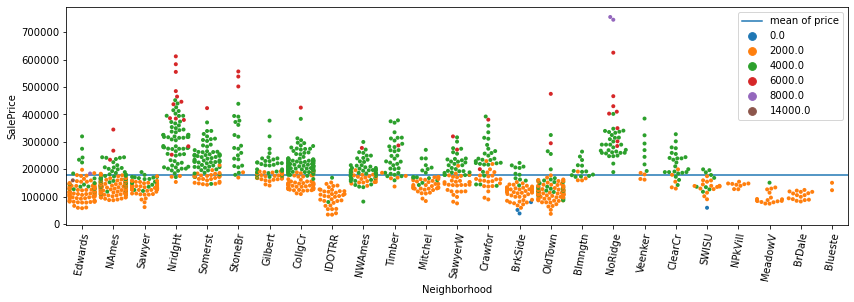

In [11]:
# we see here clearly that there isn't more expensive Neighborhood's 
# the reason that the price is higher in some place's is because they have bigger Total_All_SF's
plt.figure(figsize=(14, 4))
sb.swarmplot(data.Neighborhood, data.SalePrice, size=4, hue=((data.Total_All_SF/2000).round()) * 2000)
plt.axhline(data.SalePrice.mean(), label='mean of price')
plt.xticks(rotation=80)
plt.legend();

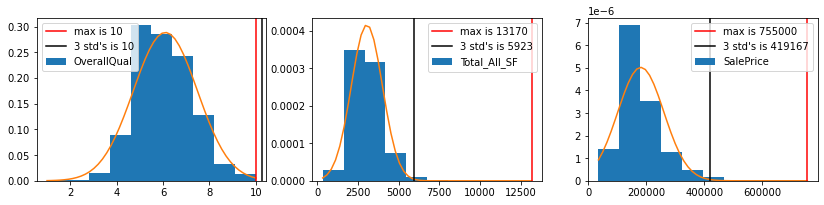

In [12]:
# we see that the data is normal but there are outliers by Total_All_SF and by SalePrice
def see_distribution(cols):
    fig, a = plt.subplots(ncols=3, figsize=(14,3))
    for i in range(3):
        col = cols.iloc[:,i]
        x = np.linspace(min(col),max(col))
        mean = np.mean(col)
        std = np.std(col)
        std3 = mean + std * 3
        mx = col.max()
        
        a[i].hist(col, density=True, label=col.name)
        a[i].plot(x, st.norm.pdf(x, loc=mean, scale=std))
        a[i].axvline(mx, label=f'max is {mx}', c='r')
        a[i].axvline(std3, label=f'3 std\'s is {std3:.0f}', c='k')
        a[i].legend()
        
see_distribution(data.loc[:,['OverallQual', 'Total_All_SF', 'SalePrice']])

the RMSE of all the data is 46842 and the slope is 67
the RMSE of the nurmal is 36947 and the slope is 66


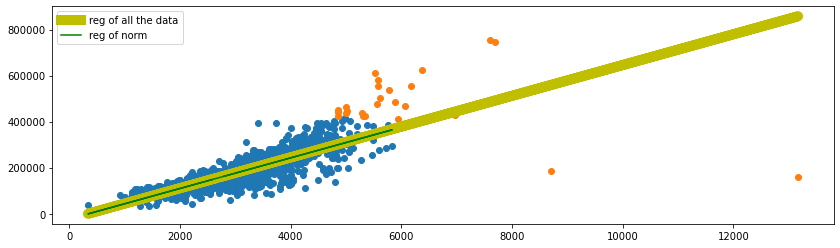

In [13]:
# we see here that the outliers don't change the slope only the RMSE so we can leave the outliers in

X = data.Total_All_SF.values.reshape(-1, 1)
y = data.SalePrice

norm = (data.Total_All_SF < data.Total_All_SF.mean() + data.Total_All_SF.std() * 3) &\
       (data.SalePrice < data.SalePrice.mean() + data.SalePrice.std() * 3)

reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)
norm_reg = LinearRegression().fit(X[norm], y[norm])
norm_y_pred = norm_reg.predict(X[norm])

plt.figure(figsize=(14, 4))
plt.scatter(X[norm], y[norm])
plt.scatter(X[~norm], y[~norm])
plt.plot(X, y_pred, c='y', linewidth=10, label='reg of all the data')
plt.plot(X[norm], norm_y_pred, c='g', label='reg of norm')
plt.legend()

print(f'the RMSE of all the data is {mean_squared_error(y, y_pred, squared=False):.0f} and the slope is {reg.coef_[0]:.0f}')
print(f'the RMSE of the nurmal is {mean_squared_error(y[norm], norm_y_pred, squared=False):.0f} and the slope is {norm_reg.coef_[0]:.0f}')


In [14]:
def fun_make_reg(X, y, reg):
    """
    Please pass one of the following Regressor name as your Regression Model:

    LinearRegression()
    SVR(kernel = 'rbf')
    DecisionTreeRegressor(random_state = 0)
    RandomForestRegressor(n_estimators = 100, random_state = 0)
    'Polynomial'

    """
    X = sc_X.fit_transform(X)
    y = sc_y.fit_transform(y)
    
    if reg == 'Polynomial':
        poly_reg = PolynomialFeatures(degree = 2)
        reg = LinearRegression().fit(poly_reg.fit_transform(X), y)
        return poly_reg, reg
    else:
        return reg.fit(X, y.ravel())

In [15]:
def fun_predict(reg, X):
#     X = sc_X.fit_transform(X) ---> this was wrong
    X = sc_X.transform(X)   # <---- this is the right one
    
    if type(reg) == tuple:
        sc_y_pred = reg[1].predict(reg[0].fit_transform(X))
        return sc_y.inverse_transform(sc_y_pred)
    else:
        sc_y_pred = reg.predict(X) 
        return sc_y.inverse_transform(sc_y_pred)

In [16]:
def fun_check_all_reg(X_train, X_test, y_train, y_test):
    # this is a list of the regressors that we are going to use
    regressors = [LinearRegression(),
                  SVR(kernel = 'rbf'),
                  DecisionTreeRegressor(random_state = 0),
                  RandomForestRegressor(n_estimators = 100, random_state = 0),
                  'Polynomial']
    
    # we are making a list of all the error's
    values = []
    for i in regressors:
        reg = fun_make_reg(X_train, y_train, i)
        y_pred = fun_predict(reg, X_test)  
        values.append(mean_squared_error(y_test, y_pred, squared=False))
    
    # we are plotting the error's
    plt.figure(figsize=(4,2))
    plt.barh(['Linear', 'SVR', 'DecisionTree', 'RandomForest', 'Polynomial'], values)
    for i, v in enumerate(values):
        plt.text(v + 1000, i, f'{v:.2f}')
        
    # we are printing the name of the best regressor
    print(f'the best is {regressors[np.argmin(values)]} {min(values):.2f}')
    
    # we are returning the best regressor
    return regressors[np.argmin(values)]

the best is Polynomial 34317.64


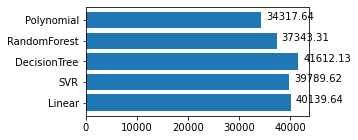

In [17]:
# we are making the best prediction 
X = data.loc[:,['OverallQual', 'Total_All_SF']]
y = data.loc[:,'SalePrice'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)
sc_X = StandardScaler()
sc_y = StandardScaler()

best_reg = fun_check_all_reg(X_train, X_test, y_train, y_test) 
reg = fun_make_reg(X_train, y_train, best_reg)
y_pred = fun_predict(reg, X_test)  

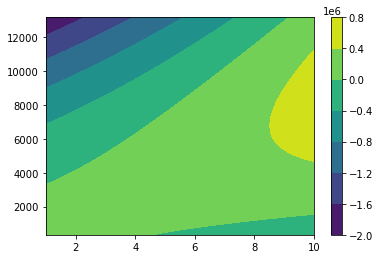

In [18]:
# we see here that the best is when Total_All_SF is 8000 and OverallQual is 10

Over_ar = np.linspace(min(data.OverallQual), max(data.OverallQual), len(data))
Total_ar = np.linspace(min(data.Total_All_SF), max(data.Total_All_SF), len(data))

X1, X2 = np.meshgrid(Over_ar, Total_ar)
two_columns = np.array([X1.ravel(), X2.ravel()]).T

pred = fun_predict(reg, two_columns).reshape(len(data), len(data))

plt.contourf(Over_ar, Total_ar, pred)
plt.colorbar();

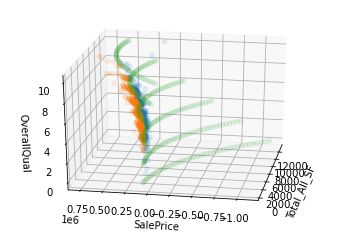

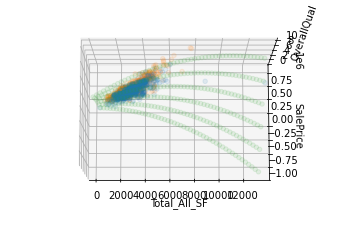

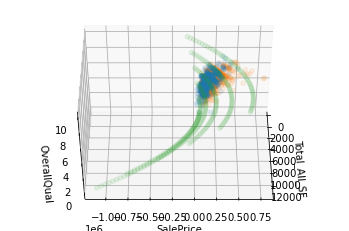

In [88]:
# we are going to predict for OverallQual 0 2 4 6 8 10 and linspace 50 for Total_All_SF like a wall
# we see here the same thing that the best is when Total_All_SF is 8000 and OverallQual is 10
wall_X = np.zeros((300, 2)) 
for i in range(6):
    wall_X[i * 50:50 + i * 50, 0] = i * 2
    wall_X[i * 50:50 + i * 50, 1] = np.linspace(min(data.Total_All_SF),max(data.Total_All_SF))
wall_y = fun_predict(reg, wall_X)

# we are going to predict for all the data
all_data_X = data.loc[:,['OverallQual', 'Total_All_SF']]
all_data_y = fun_predict(reg, all_data_X)

# to give two colors for both sides of the wall
high = all_data_y[:,0] - data.SalePrice > 0

def show_plot(top, side):
    ax = plt.axes(projection ="3d")
    ax.scatter3D(data.Total_All_SF[high], data.SalePrice[high], data.OverallQual[high], alpha=.1)
    ax.scatter3D(data.Total_All_SF[~high], data.SalePrice[~high], data.OverallQual[~high], alpha=.1)
    ax.scatter3D(wall_X[:,1], wall_y, wall_X[:,0], alpha=.1)
    ax.set_xlabel('Total_All_SF')  
    ax.set_ylabel('SalePrice')  
    ax.set_zlabel('OverallQual')
    ax.view_init(top, side)
    plt.show()

show_plot(25,190)
show_plot(80,270)
show_plot(45,0)    

the best is Polynomial 28964.45


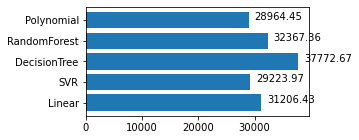

In [89]:
# we are making the best prediction without the outliers
X = data[norm].loc[:,['OverallQual', 'Total_All_SF']]
y = data[norm].loc[:,'SalePrice'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)
sc_X = StandardScaler()
sc_y = StandardScaler()

best_reg = fun_check_all_reg(X_train, X_test, y_train, y_test) 
reg = fun_make_reg(X_train, y_train, best_reg)
y_pred = fun_predict(reg, X_test)  